In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Technical Indicators

In [249]:
data = pd.read_csv("../datasets/rates_2017_may_60min.csv")
#data = data[-300:-150]

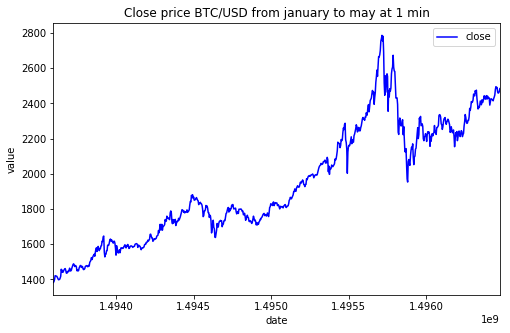

In [250]:
data.plot(style='b',
          figsize=(8,5),
          x='time', 
          y='close', 
          title='Close price BTC/USD from january to may at 1 min',
         )
plt.xlabel('date')
plt.ylabel('value')

In [251]:
## Changing default index to timestamps
data.index = data['time']
#data = data.drop('time', axis=1)

In [252]:
data.head()

,time,low,high,open,close,volume
time,,,,,,
1493596800,1493596800,1370.98,1397.90,1384.55,1382.96,1071.650212
1493600400,1493600400,1382.72,1396.00,1382.95,1389.10,638.953405
1493604000,1493604000,1387.63,1399.99,1389.10,1399.99,620.085948
1493607600,1493607600,1398.02,1427.34,1399.53,1421.42,958.529396
1493611200,1493611200,1410.00,1424.17,1421.44,1420.36,586.752607


In [253]:
start=5
stop=45
step=5
print range(start, stop, step)

[5, 10, 15, 20, 25, 30, 35, 40]


In [254]:
for span in range(start, stop, step):
    data['ema{}'.format(span)] = data['close'].ewm(span=span).mean()

In [272]:
with open('mar_out.csv', 'w') as f:
    f.write('time,action\n')
        

    long=False
    ema_labels = ['ema{}'.format(span) for span in range(start, stop, step)]
    crossover_flags = [0 for _ in ema_labels[:-1]] # Ignore the last since it obviously crosses with itself anytime
    buy_idx = []; sell_idx = [] # for plotting 

    
    for i in range(len(data)):
        if long and sum(crossover_flags) == 0:
            long=False
            print 'Sell signal generated at {} when price was {}'.format(int(data.iloc[i].time), data.iloc[i].close)
            f.write('{},{}\n'.format(int(data.iloc[i].time), "SELL"))
            sell_idx.append(int(data.iloc[i].time))
        elif not long and sum(crossover_flags) == len(crossover_flags):
            long=True
            print 'Buy signal generated at {} when price was {}'.format(int(data.iloc[i].time), data.iloc[i].close)
            f.write('{},{}\n'.format(int(data.iloc[i].time), "BUY"))
            buy_idx.append(int(data.iloc[i].time))
        for j in range(len(ema_labels[:-1])): 
            if data.iloc[i][ema_labels[j]] - data.iloc[i][ema_labels[-1]] >= 0:
                crossover_flags[j] = 1
            else:
                crossover_flags[j] = 0
print '==== DONE ===='
f.close()

Buy signal generated at 1493600400 when price was 1389.1
Sell signal generated at 1494619200 when price was 1684.31
Buy signal generated at 1494738000 when price was 1800.38
Sell signal generated at 1494856800 when price was 1730.99
Buy signal generated at 1494982800 when price was 1757.15
Sell signal generated at 1495828800 when price was 2316.71
Buy signal generated at 1496084400 when price was 2335.92
Sell signal generated at 1496185200 when price was 2191.58
Buy signal generated at 1496257200 when price was 2294.98
==== DONE ====


In [256]:
%matplotlib inline

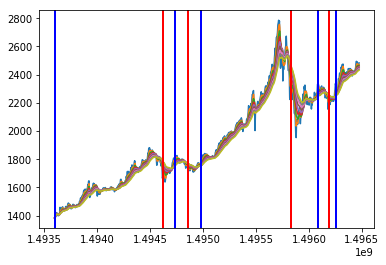

In [273]:
plt.plot(data.close)
plt.plot(data[ema_labels])
for i in buy_idx:
    plt.axvline(x=i, ymin=0, ymax = 2800, linewidth=2, color='b')
for j in sell_idx:
    plt.axvline(x=j, ymin=0, ymax = 2800, linewidth=2, color='r')